<a href="https://colab.research.google.com/github/alagu-95/Internship-Projects/blob/main/Predict_Restaurant_Rating_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Predict Restaurant Rating

#Objective:
Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

In [ ]:
# Libraries Required
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/alagu-95/Internship-Projects/refs/heads/main/Predict%20Restaurant%20Rating.csv')
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [ ]:
df.tail(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [ ]:
# Dataset Shape
df.shape

(9551, 21)

In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Find duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Determine the NUll Values
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


Objective:

- Some feature have null values

##Handling Missing Values

In [ ]:
# Replace with fillna
df['Cuisines'].fillna(method='ffill', inplace=True)

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


Objective:

- No null values after performance of Fillna.

In [ ]:
# Dataset Mean
df.mean(numeric_only=bool).round()

,0
Restaurant ID,9051128.0
Country Code,18.0
Longitude,64.0
Latitude,26.0
Average Cost for two,1199.0
Price range,2.0
Aggregate rating,3.0
Votes,157.0


In [ ]:
# Dataset Median
df.median(numeric_only=bool).round()

,0
Restaurant ID,6004089.0
Country Code,1.0
Longitude,77.0
Latitude,29.0
Average Cost for two,400.0
Price range,2.0
Aggregate rating,3.0
Votes,31.0


In [ ]:
# Dataset Mode
df.mode().iloc[0]

,0
Restaurant ID,53
Restaurant Name,Cafe Coffee Day
Country Code,1.0
City,New Delhi
Address,"Dilli Haat, INA, New Delhi"
Locality,Connaught Place
Locality Verbose,"Connaught Place, New Delhi"
Longitude,0.0
Latitude,0.0
Cuisines,North Indian


In [ ]:
df.fillna(0).head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [ ]:
# summary of Descriptive Statistics
df.describe().round()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0,9551.0
mean,9051128.0,18.0,64.0,26.0,1199.0,2.0,3.0,157.0
std,8791521.0,57.0,41.0,11.0,16121.0,1.0,2.0,430.0
min,53.0,1.0,-158.0,-41.0,0.0,1.0,0.0,0.0
25%,301962.0,1.0,77.0,28.0,250.0,1.0,2.0,5.0
50%,6004089.0,1.0,77.0,29.0,400.0,2.0,3.0,31.0
75%,18352292.0,1.0,77.0,29.0,700.0,2.0,4.0,131.0
max,18500652.0,216.0,175.0,56.0,800000.0,4.0,5.0,10934.0


In [ ]:
# Analyze the Distribution of Numerical Features
Numerical_Features = df.select_dtypes(include=['int64', 'float64']).columns
Numerical_Features

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [ ]:
Q1 = df[Numerical_Features].quantile(0.25).round()
Q3 = df[Numerical_Features].quantile(0.75).round()

IQR = Q3 - Q1
IQR

,0
Restaurant ID,18050330.0
Country Code,0.0
Longitude,0.0
Latitude,1.0
Average Cost for two,450.0
Price range,1.0
Aggregate rating,2.0
Votes,126.0


In [ ]:
Lower_bound = Q1 - 1.5 * IQR
print(Lower_bound, end='\n\n')

Upper_bound = Q3 + 1.5 * IQR
print(Upper_bound)

Restaurant ID          -26773533.0
Country Code                   1.0
Longitude                     77.0
Latitude                      26.5
Average Cost for two        -425.0
Price range                   -0.5
Aggregate rating              -1.0
Votes                       -184.0
dtype: float64

Restaurant ID           45427787.0
Country Code                   1.0
Longitude                     77.0
Latitude                      30.5
Average Cost for two        1375.0
Price range                    3.5
Aggregate rating               7.0
Votes                        320.0
dtype: float64


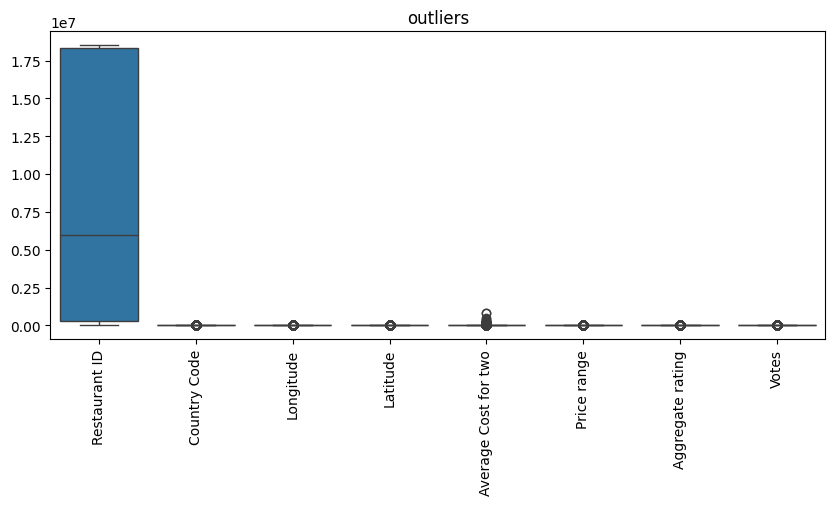

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data= df)
plt.title('outliers')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.shape

(9551, 21)

In [ ]:
# Remove of outliers
outliers = (df[Numerical_Features] < Lower_bound) & (df[Numerical_Features] > Upper_bound)
print(outliers.sum())

Restaurant ID           0
Country Code            0
Longitude               0
Latitude                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64


In [ ]:
# Analyze the Distribution of Categorical Features
Categorical_Features = df.select_dtypes(include = ['object'])
for col in Categorical_Features.columns:
  print(f'{col} :\n{Categorical_Features[col].value_counts()}', end = '\n\n')

Restaurant Name :
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
HotMess                      1
Healthy Routes               1
Fuji Japanese Restaurant     1
Fa Yian                      1
Unplugged Courtyard          1
Name: count, Length: 7446, dtype: int64

City :
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

Address :
Address
Dilli Haat, INA, New Delhi                                                      11
Sector 41, Noida                                                                11
Greater Kailash (GK) 1, New Delhi                                               10
The Imperial

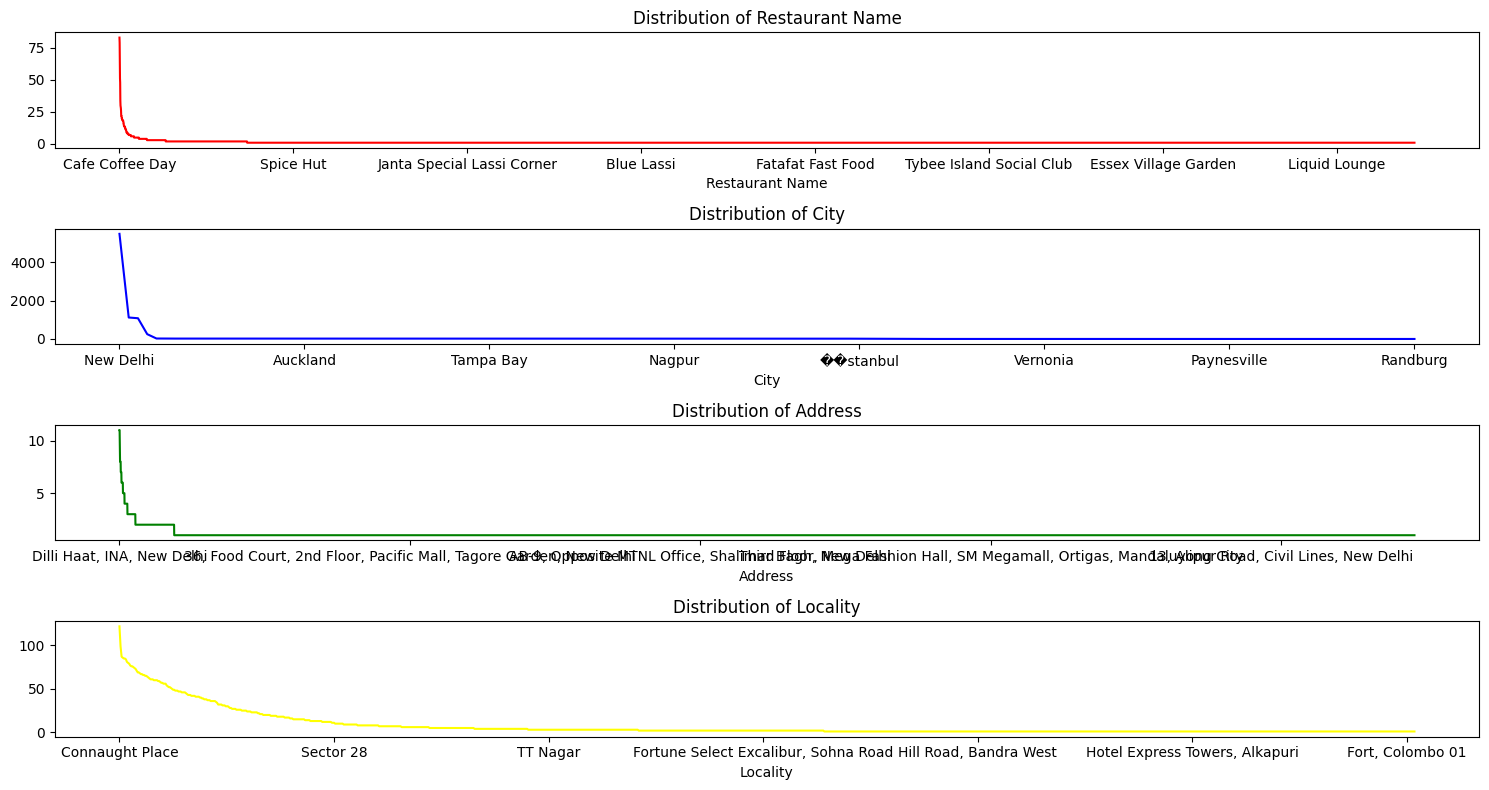

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (15, 8))
axes = ax.flatten()
color = ['Red', 'Blue', 'Green', 'Yellow']

for col, axis, color in zip(Categorical_Features.columns, axes, color):
  df[col].value_counts().plot(kind = 'line', ax = axis, color = color)
  axis.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze the Distribution of Numerical Features
Numerical_Features = df.select_dtypes(include=['int64', 'float64']).columns
for col in Numerical_Features:
  print(f'{col}:\n{df[col].value_counts()}', end ='\n\n')

Restaurant ID:
Restaurant ID
5927402     1
6317637     1
6304287     1
6300002     1
6318506     1
           ..
6308205     1
18255654    1
6318213     1
18182702    1
18185059    1
Name: count, Length: 9551, dtype: int64

Country Code:
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

Longitude:
Longitude
0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.230347      1
77.230578      1
77.231330      1
77.233869      1
77.132515      1
Name: count, Length: 8120, dtype: int64

Latitude:
Latitude
0.000000     498
28.574309     16
28.574300      9
28.551456      9
28.597103      8
            ... 
28.641017      1
28.643904      1
28.645252      1
28.641159      1
28.643740      1
Name: count, Length: 8677, dtype: int64

Average Cost for two:
Average Cost for two
500

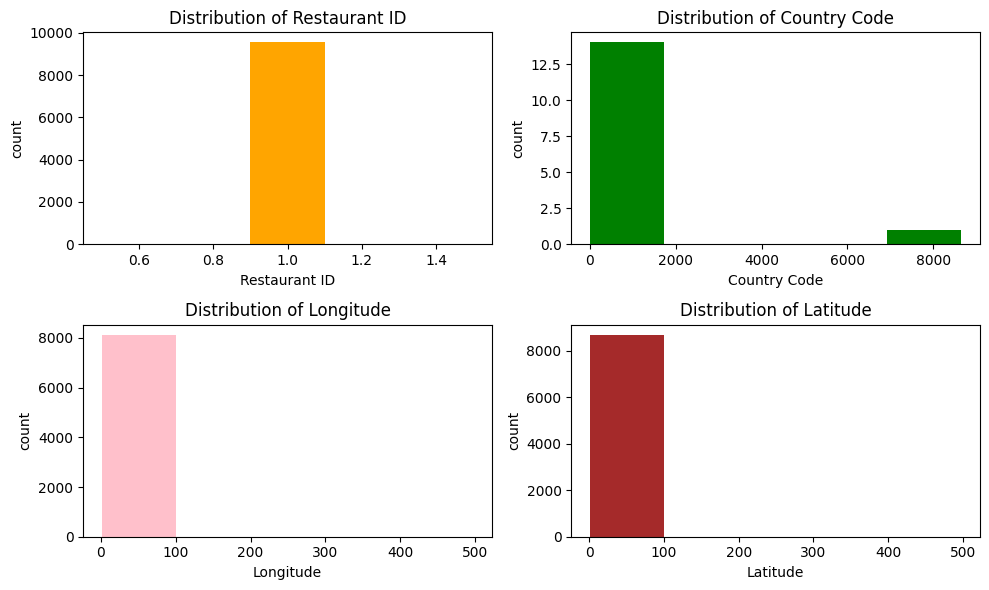

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize = (10, 6))
axes = ax.flatten()
color = ['Orange', 'Green', 'Pink', 'Brown']

for col, axis, color in zip(Numerical_Features, axes, color):
  df[col].value_counts().plot(kind = 'hist', bins = 5, ax = axis, color = color, fill = True)
  axis.set_title(f'Distribution of {col}')
  axis.set_xlabel(col)
  axis.set_ylabel('count')
plt.tight_layout()
plt.show()

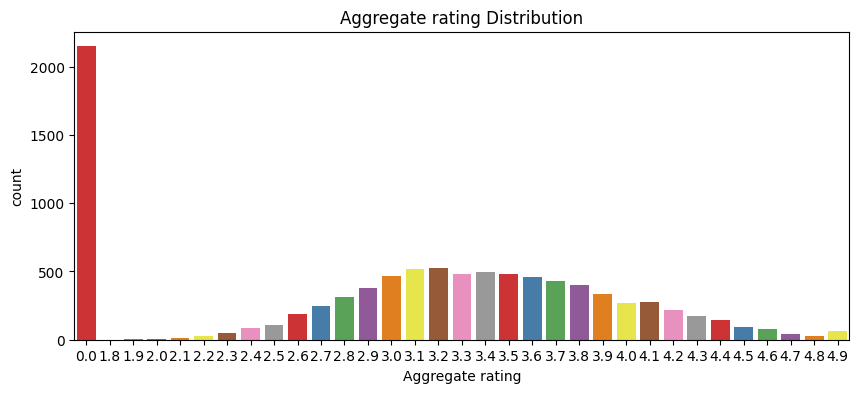

In [ ]:
# Univariate Analysis

plt.figure(figsize = (10, 4))
sns.countplot(data = df, x = 'Aggregate rating', palette= 'Set1')
plt.title('Aggregate rating Distribution')
plt.show()

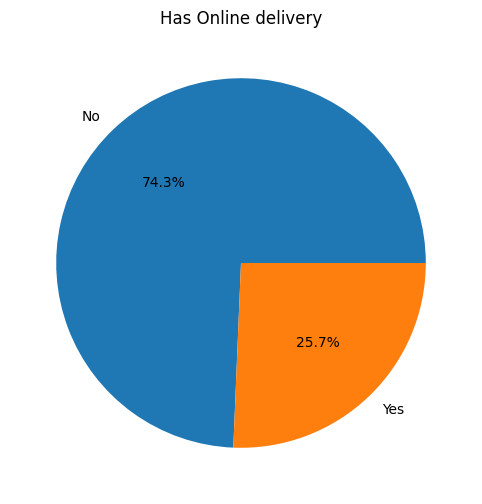

In [ ]:
# Bivariate Analysis

plt.figure(figsize=(10,6))
plt.pie(df['Has Online delivery'].value_counts(), labels = df['Has Online delivery'].unique(), autopct= '%1.1f%%')
plt.title('Has Online delivery')
plt.show()

<Figure size 1000x600 with 0 Axes>

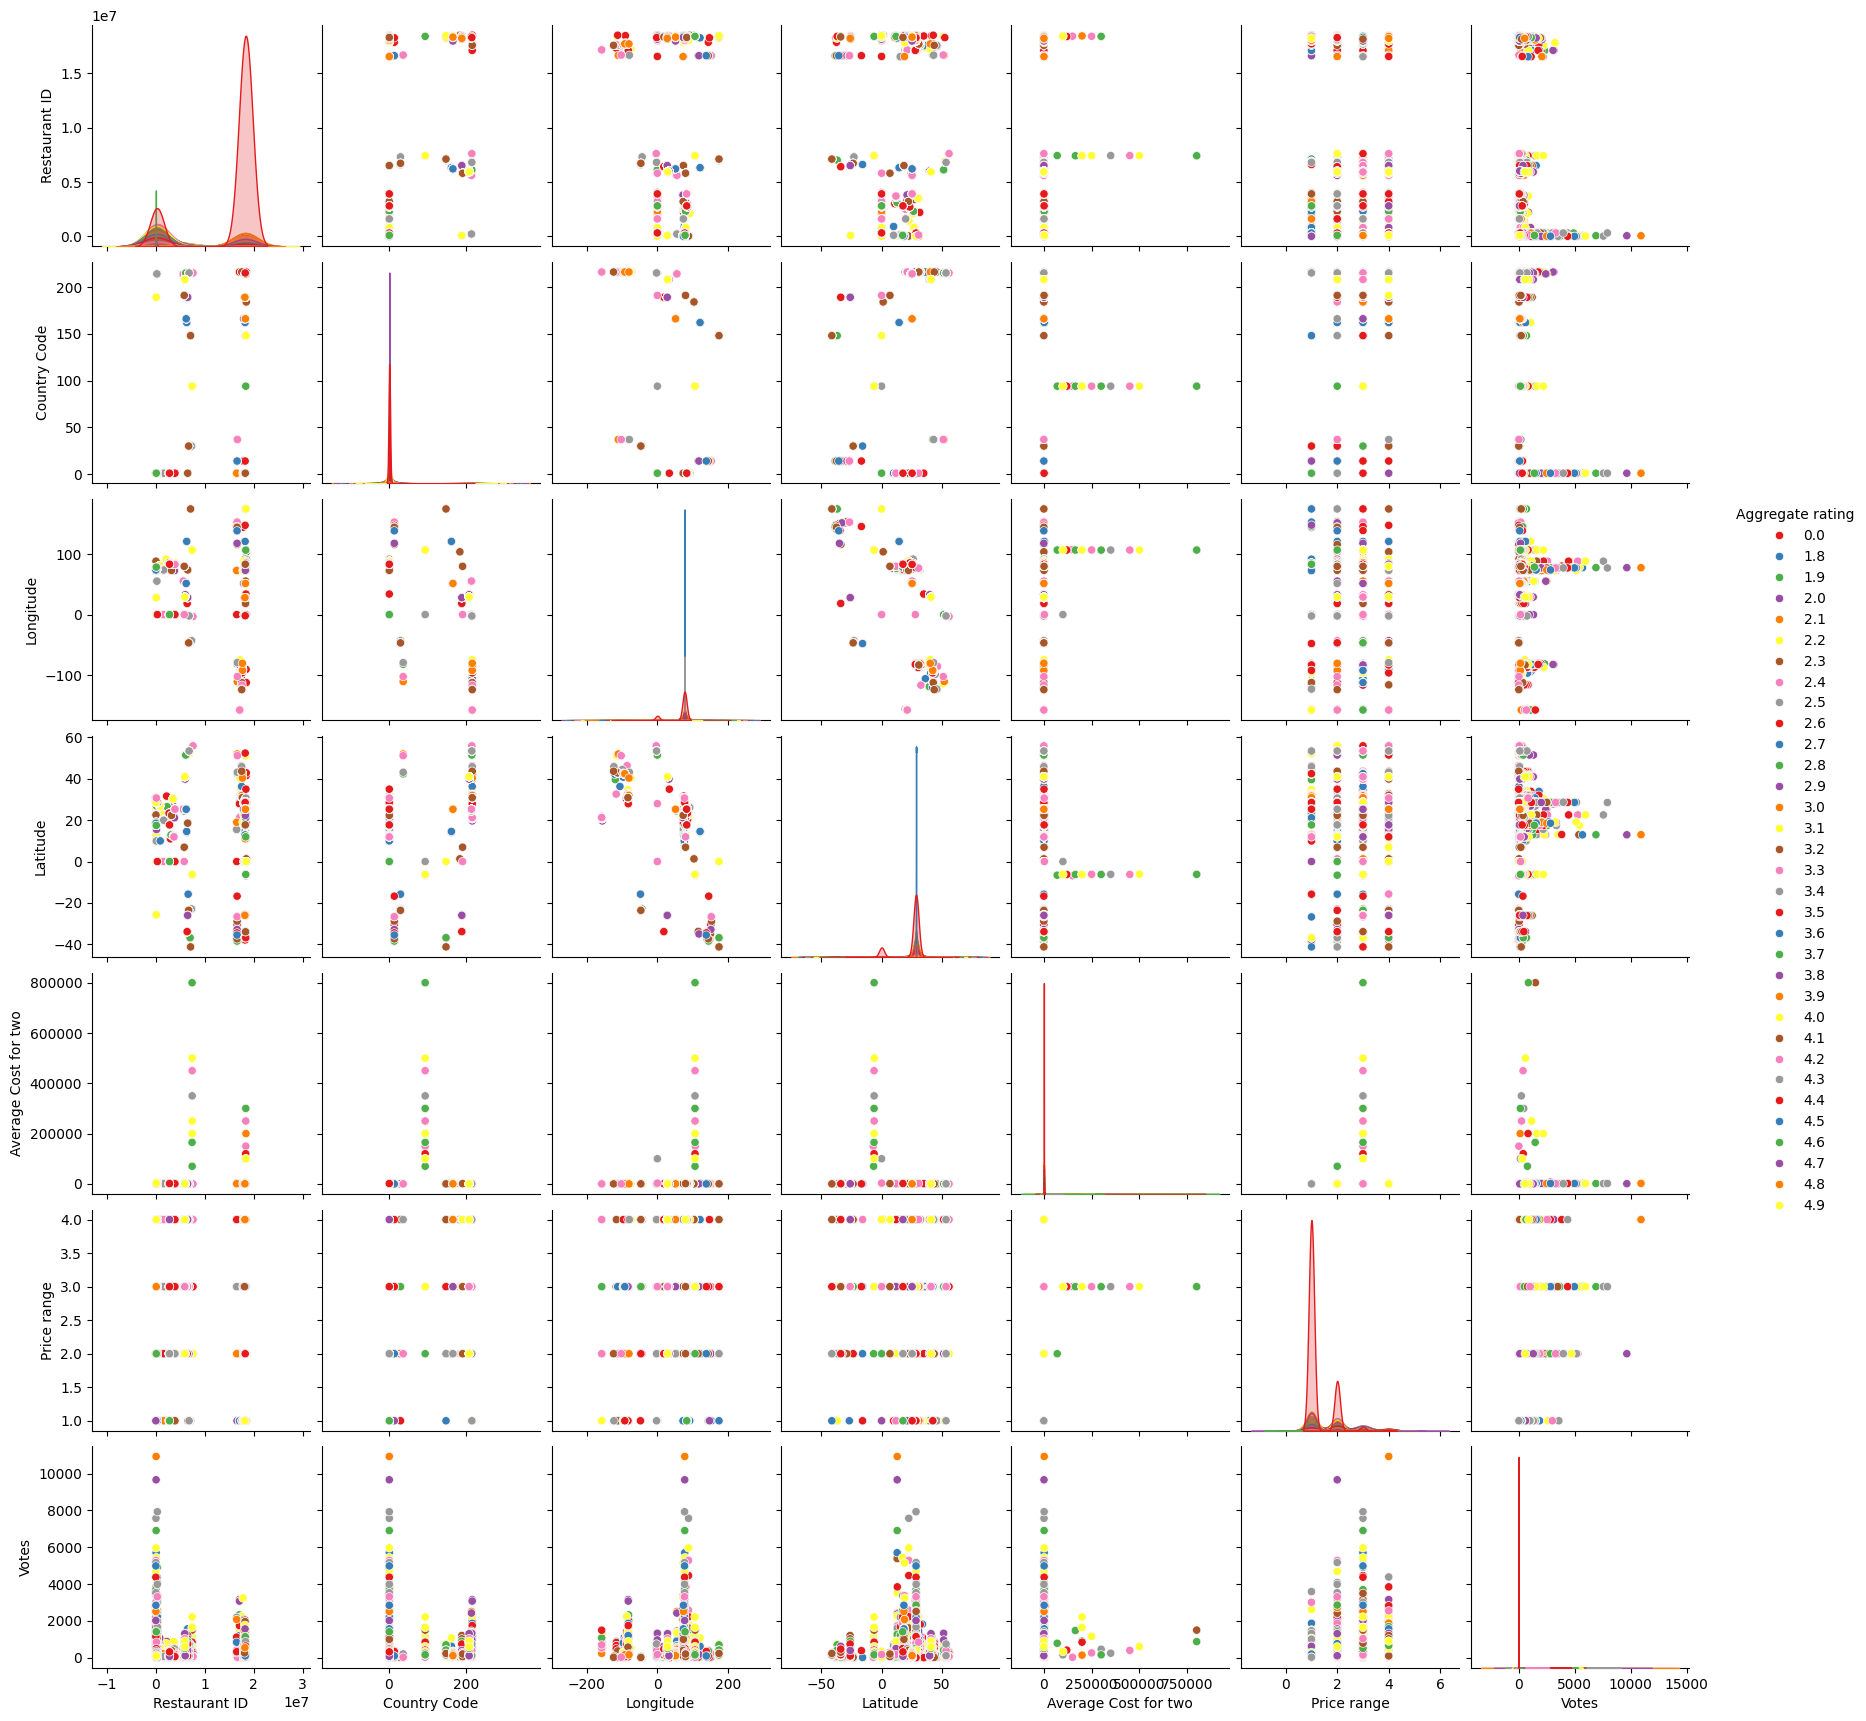

In [ ]:
# Multivariate Analysis

plt.figure(figsize = (10,6))
sns.pairplot(data = df, hue= 'Aggregate rating', palette= 'Set1')
plt.show()

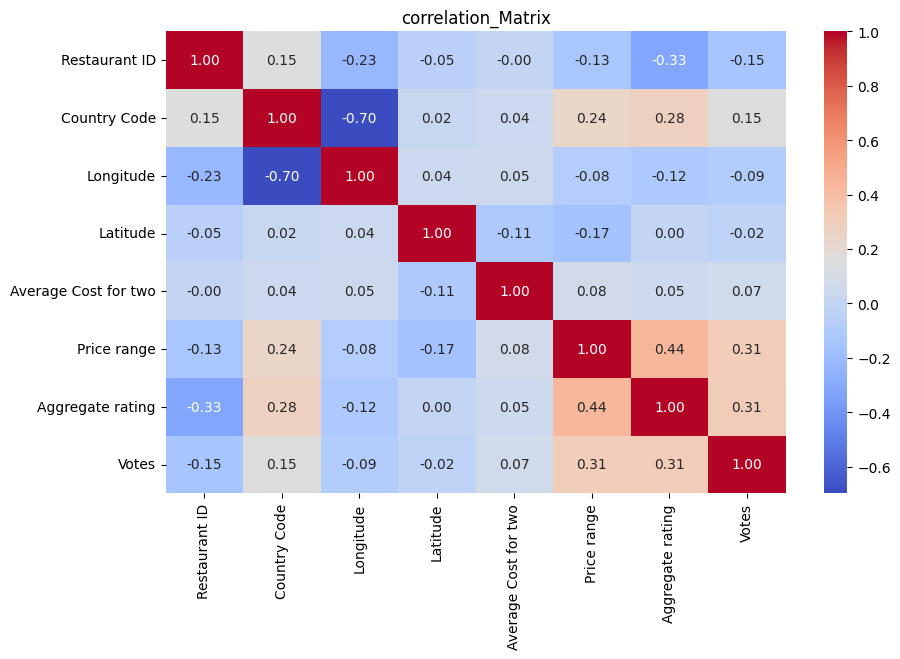

In [ ]:
# Correlation Matrix

correlation_Matrix = df[Numerical_Features].corr()

# Using Heatmap Visualization
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_Matrix, annot = True, cmap = 'coolwarm', fmt= '.2f')
plt.title('correlation_Matrix')
plt.show()

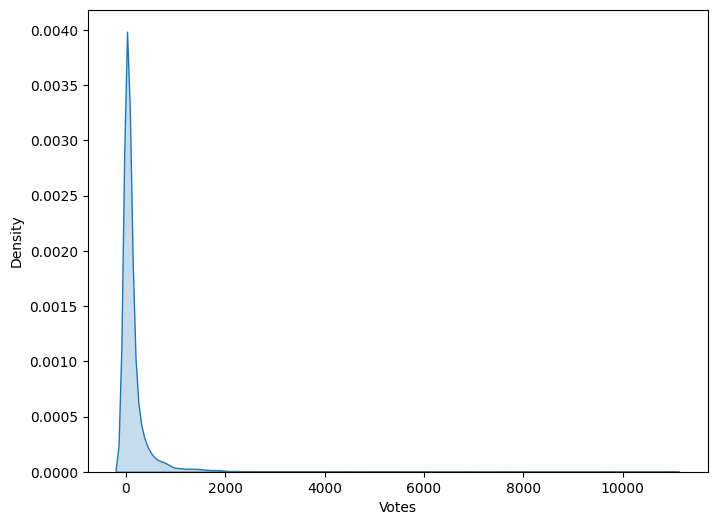

In [ ]:
# Find the Skewness

df[Numerical_Features].skew()

plt.figure(figsize=(8,6))
sns.kdeplot(df['Votes'], fill = True)
plt.show()

In [ ]:
# Make a copy of original dataset

df1 = df.copy()

In [ ]:
# Create a cat_columns for df1

cat_columns = df1.select_dtypes(include=['object']).columns
cat_columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

##Feature Engineering

In [ ]:
# Label Encoding for Categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_columns:
  df1[col] = le.fit_transform(df1[col])

df1.head().round(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3748,162,73,8685,171,172,121.0,14.6,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.0,14.6,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.1,14.6,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.1,14.6,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.1,14.6,1122,...,0,1,0,0,0,4,4.8,0,1,229


##Feature Selection

In [ ]:
features = df1.drop('Aggregate rating', axis = 1)
target = 'Aggregate rating'
x = df1.drop('Aggregate rating', axis = 1)
y = df1['Aggregate rating']

x.head().round()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
0,6317637,3748,162,73,8685,171,172,121.0,15.0,920,1100,0,1,0,0,0,3,0,1,314
1,6304287,3172,162,73,6055,593,601,121.0,15.0,1111,1200,0,1,0,0,0,3,0,1,591
2,6300002,2896,162,75,4684,308,314,121.0,15.0,1671,4000,0,1,0,0,0,4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.0,15.0,1126,1500,0,0,0,0,0,4,0,1,365
4,6314302,5523,162,75,8689,862,875,121.0,15.0,1122,1500,0,1,0,0,0,4,0,1,229


In [ ]:
df1.drop(columns=['Switch to order menu'], inplace= True)

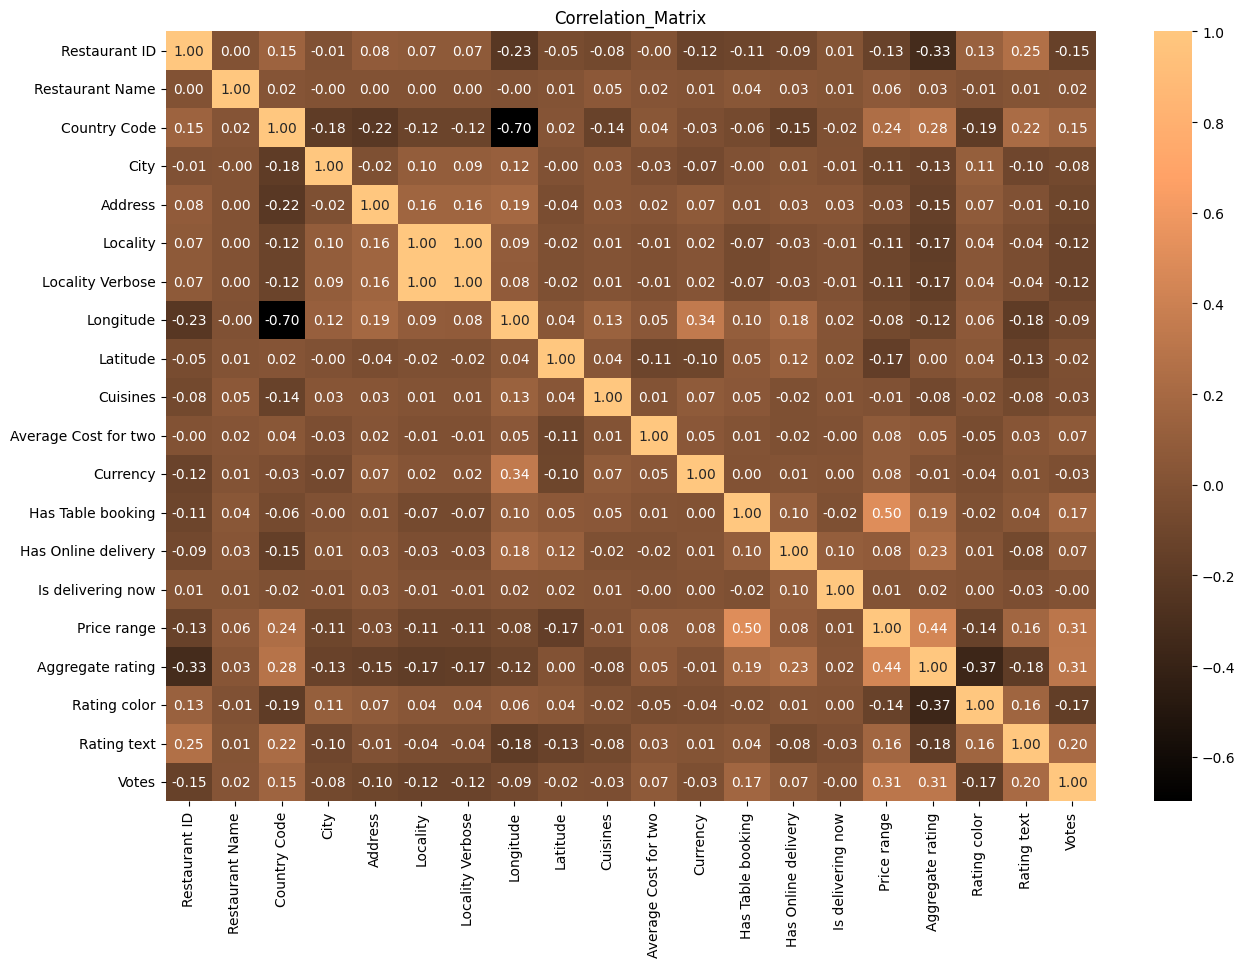

In [ ]:
# Finding Correlation Matrix

Correlation_Matrix = df1.corr()

plt.figure(figsize=(15,10))
sns.heatmap(Correlation_Matrix, annot = True, cmap = 'copper', fmt= '.2f')
plt.title('Correlation_Matrix')
plt.show()

##Split Data for Training and Testing

In [ ]:
# Training and Testing sets to evaluate the model's performance.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'Dataset Shape : {df1.shape}')
print(f'x_train Shape : {x_train.shape}')
print(f'x_test Shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

Dataset Shape : (9551, 20)
x_train Shape : (7640, 20)
x_test Shape : (1911, 20)
y_train shape : (7640,)
y_test shape : (1911,)


In [ ]:
# Check balance in both sets.

print("Train Distribution:\n", y_train.value_counts(normalize=True), end='\n\n')
print("Test Distribution:\n", y_test.value_counts(normalize=True))

Train Distribution:
 Aggregate rating
0.0    0.226047
3.1    0.055236
3.2    0.054188
3.5    0.050916
3.4    0.050524
3.3    0.049869
3.0    0.049346
3.6    0.045681
3.7    0.045026
3.8    0.041361
2.9    0.039136
3.9    0.035733
2.8    0.032984
4.0    0.028927
4.1    0.028403
2.7    0.026440
4.2    0.023168
2.6    0.020288
4.3    0.017801
4.4    0.015183
2.5    0.012173
4.5    0.009817
2.4    0.008901
4.6    0.007984
4.9    0.006283
2.3    0.005628
4.7    0.004581
2.2    0.002880
4.8    0.002487
2.1    0.001832
2.0    0.000785
1.9    0.000262
1.8    0.000131
Name: proportion, dtype: float64

Test Distribution:
 Aggregate rating
0.0    0.220304
3.4    0.058608
3.6    0.057038
3.2    0.056515
3.3    0.053375
3.1    0.050759
3.5    0.047619
3.0    0.047619
3.8    0.043956
3.7    0.043433
2.9    0.042909
2.8    0.032967
3.9    0.032444
4.1    0.029827
2.7    0.025118
4.0    0.023548
4.2    0.023025
4.3    0.019885
2.6    0.018838
4.4    0.014652
4.5    0.010466
2.4    0.009942
4.6    0.00

##Feature Selection

In [ ]:
# Using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting and Transforming

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

##Model Selection

###Regression

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr_reg = lr.fit(x_train_scaler, y_train)

# Prdict the model
lr_pred = lr_reg.predict(x_test_scaler)
print(f'mean_squared_error : {mean_squared_error(y_test, lr_pred):.2f}')
print(f'r2_score : {r2_score(y_test, lr_pred):.2f}')


mean_squared_error : 1.22
r2_score : 0.46


In [ ]:
# K-Neighbors Regression

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_reg = knn.fit(x_train_scaler, y_train)
knn_pred = knn_reg.predict(x_test_scaler)
print(f'mean_squared_error : {mean_squared_error(y_test, knn_pred):.2f}')
print(f'r2_score : {r2_score(y_test, knn_pred):.2f}')

mean_squared_error : 0.36
r2_score : 0.84


In [ ]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_reg = dt.fit(x_train_scaler, y_train)
dt_pred = dt_reg.predict(x_test_scaler)
print(f'mean_squared_error : {mean_squared_error(y_test, dt_pred):.2f}')
print(f'r2_score : {r2_score(y_test, dt_pred):.2f}')

mean_squared_error : 0.06
r2_score : 0.97


In [ ]:
# Random forest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf_reg = rf.fit(x_train_scaler, y_train)
rf_pred = rf_reg.predict(x_test_scaler)
print(f'mean_squared_error : {mean_squared_error(y_test, rf_pred):.2f}')
print(f'r2_score : {r2_score(y_test, rf_pred):.2f}')

mean_squared_error : 0.03
r2_score : 0.99


In [ ]:
# Gradient Boost Regression

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators= 100)
gb.fit(x_train_scaler, y_train)
gb_pred = gb.predict(x_test_scaler)
print(f'mean_squared_error : {mean_squared_error(y_test, gb_pred):.2f}')
print(f'r2_score : {r2_score(y_test, gb_pred):.2f}')

mean_squared_error : 0.03
r2_score : 0.99


In [ ]:
# Dictionary of regression models

regression_models = {
    'Linear Regression': lr,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boost': gb


}

results = {}
# iteration through the regression models
for name, model in regression_models.items():
    model.fit(x_train_scaler, y_train)
    y_pred = model.predict(x_test_scaler)
    # Calculate R2 score and Mean Absolute Error
    r2 = r2_score(y_test, y_pred)
    mae = mean_squared_error(y_test, y_pred)
    # Store the results in the dictionary
    results[name] = {'R2 Score': r2, 'Mean Absolute Error': mae}

# Convert the results dictionary to dataframe
results_df = pd.DataFrame(results).T
results_df

,R2 Score,Mean Absolute Error
Linear Regression,0.464481,1.218900
KNN,0.843028,0.357286
Decision Tree,0.975012,0.056876
Random Forest,0.988167,0.026933
Gradient Boost,0.988705,0.025709


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
    }

grid_search = GridSearchCV(estimator= RandomForestRegressor(), param_grid= param_grid, cv= 3, verbose= 2, n_jobs= -1)
grid_search.fit(x_train_scaler, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.99


##Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

best_random_forest = grid_search.best_estimator_
y_pred = best_random_forest.predict(x_test_scaler)

print(f'R2_Score= {r2_score(y_test, y_pred):.4f}')
print(f'mean_squared_error= {mean_squared_error(y_test, y_pred): .4f}')
print(f'Root_mean_square_error= {mean_squared_error(y_test, y_pred)**0.5: .4f}')

R2_Score= 0.9884
mean_squared_error=  0.0263
Root_mean_square_error=  0.1622


Objective:

- The model evaluation gives the best R2_score is 98%.
- Mean squared error is 0.
- RMSE gives 0.2.

##Feature Importance

In [ ]:

rf.feature_importances_.round(3)

array([0.002, 0.001, 0.   , 0.   , 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.081,
       0.008, 0.899])

In [ ]:
Feature_importance = pd.Series(rf.feature_importances_, index= x.columns, name= 'FeatureImportance').sort_values().round(3)
Feature_importance

,FeatureImportance
Switch to order menu,0.000
Country Code,0.000
Currency,0.000
Is delivering now,0.000
Has Table booking,0.000
Price range,0.000
City,0.000
Has Online delivery,0.000
Locality,0.001
Locality Verbose,0.001


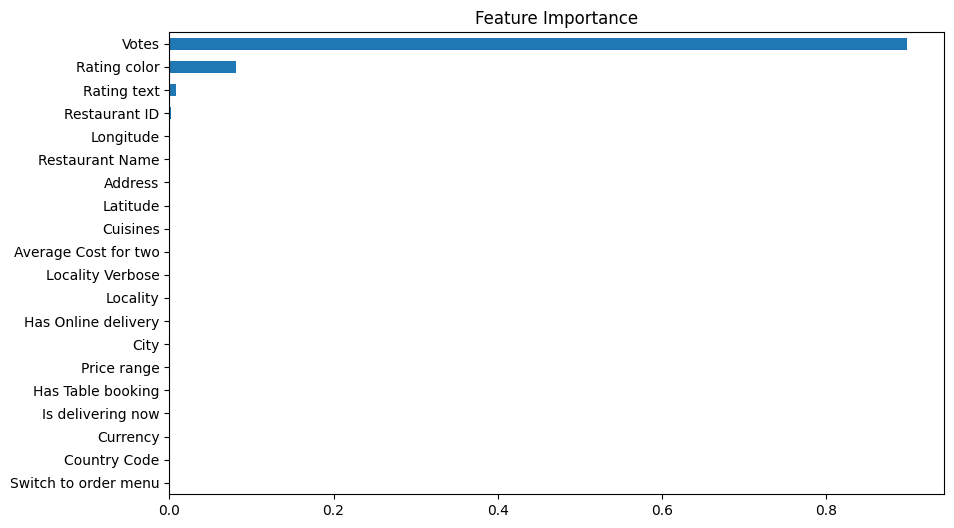

In [ ]:
Feature_importance.plot(kind= 'barh', figsize=(10,6))
plt.title('Feature Importance')
plt.show()

Objective:

- From the Interpreting the model's results, here the analyze the **VOTES**
  most influential features affecting restaurant ratings.